In [1]:
import numpy as np
import pandas as pd

In [2]:
# This is for basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [ ]:
## Run this if you do not know the encoding format
#import chardet    
#rawdata = open("source/tweets_all.csv", "rb").read()
#result = chardet.detect(rawdata)
#charenc = result['encoding']
#print(charenc)

In [ ]:
data = pd.read_csv("source/tweets_all.csv",encoding="Windows-1252") 

In [ ]:
data.head()

In [ ]:
# Now get latitude and longitude of tweet

In [ ]:
# Now get the timestamp

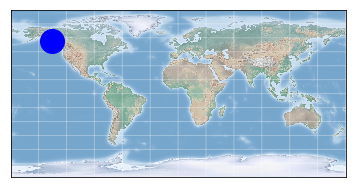

In [3]:
# Now test the visualisation for one
fig1 = plt.figure(facecolor='w')
ax1  = fig1.add_subplot(111)
# fig = plt.figure(figsize=(8, 6), edgecolor='w')
map = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(map)

lon = -135.3318
lat = 57.0799
x,y = map(lon, lat)
map.plot(x, y, 'bo', markersize=24)
 
plt.show()